# Answer to Q1

In [217]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
def f1(x):
    return math.exp(-1*x) - x

In [158]:
def FixedPoint(x_k):
    x_k1, e = 1, 0.00001
    g = x_k
    while abs(x_k1 - x_k)/abs(x_k1)>e:
        g = f1(x_k1) + x_k1
        x_k, x_k1 = x_k1, g
        #print(g)
    return g
        
x_k = 0
root = FixedPoint(x_k)
print("Using fixed-point method, root = ",round(root,4))

Using fixed-point method, root =  0.5671


# Answer to Q2

In [7]:
def f2(x):
    return math.sqrt(1+x**4)

In [8]:
#Simpson's method
def SimpMeth(N,b,a):
    interval = (b-a)/N
    x_i=[0 for i in range(N+1)]
    
    for i in range(0,N+1,2):
        x_i[i]=a+i*interval
        
    for i in range(1,N,2):
        x_i[i]=(x_i[i-1] + x_i[i+1])/2
    #print(x_i)
    
    h=(x_i[2]-x_i[0])/2
    sum=0
    for i in range(N+1):
        if i==0 or i==N:
            sum = sum + (h*f2((x_i[i])))/3
        elif i%2==0:
            sum = sum + (2*h*f2((x_i[i])))/3
        else:
            sum = sum + (4*h*f2((x_i[i])))/3
    return sum

In [182]:
#Derivative of Legendre Polynom
def Pn_dr(x,n):
    if n == 0:
        return 0
    elif n == 1:
            return 1
    else:
        return (n*(Pn(x,n-1)-x*Pn(x,n)))/(1-x**2)

#Newton-Raphson for finding roots of legendre polynomial
def NewtonRaphson(f,x0,num,x):
    e=0.000001
    while abs(x-x0)>e or f(x,num)>e:
        x0=x
        x=x0-f(x0,num)/Pn_dr(x0,num)
    return x

In [189]:
#Gaussian Quadrature Method
def Pn(x,n): #defining Legendre Polynomial
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2*n-1)*x*Pn(x,n-1)-(n-1)*Pn(x,n-2))/n   
    
#finds roots of Legendre Polynomial
def Pn_roots(num):
    roots = []
    for i in range(1, num + 1):
        guess = np.cos((2*i - 1) * np.pi / (2 * num))
        guess1 = guess + 2
        result = NewtonRaphson(Pn, guess, num, guess1)
        if result != 0:
            roots.append(result)
    return roots

#finds weight
def weight(n):
    roots=Pn_roots(n)
    weights=[]
    for i in range(n):
        w=2/((1-roots[i]**2)*(Pn_dr(roots[i],n))**2)
        weights.append(w)
    return weights

def GaussianQuad(deg,b,a):
    sum = 0
    weights=weight(deg)
    roots=Pn_roots(deg)
    for i in range(deg):
        y=(((b-a)*roots[i])/2)+((b+a)/2)
        wf=weights[i]*f2(y)
        sum+=wf
    val=((b-a)*sum)/2
    return val
    

In [191]:
N, b, a =8, 1, 0
print("Simpson Method")
int1 = SimpMeth(N,b,a)
print(round(int1,6))

deg = 3 
print("Gaussian Quadrature Method")
int2 = GaussianQuad(deg,b,a)
print(round(int2,6))
print("(Not exactly accurate as we are using Newton Raphson to estimate roots of legendre polynomial)")

Simpson Method
1.089429
Gaussian Quadrature Method
1.060607
(Not exactly accurate as we are using Newton Raphson to estimate roots of legendre polynomial)


# Answer to Q3


Interval Size   Result
-------------------------------------
0.05            2.4468426599385564
-------------------------------------


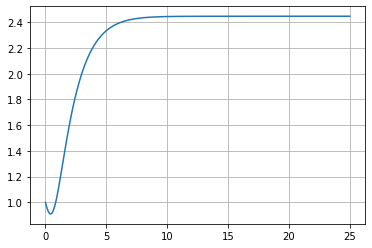

-------------------------------------
0.5            2.446947724546922
-------------------------------------


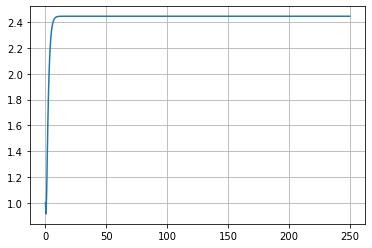

-------------------------------------
0.01            2.334213872195728
-------------------------------------


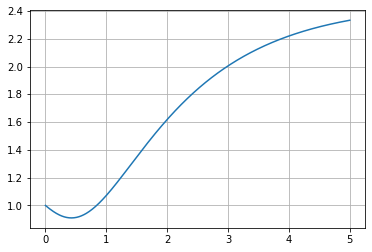

-------------------------------------
0.2            2.4468449439350146
-------------------------------------


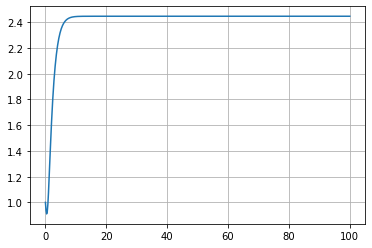

-------------------------------------


In [94]:
#Fourth order Runge Kutta RK4
import numpy as np
import math
import matplotlib.pyplot as plt

def f3(x,y):
    return (5*x**2-y)/(math.exp(x+y))

def RungeKutta4(x0,y0,h):
    x, y, k1, k2, k3, k4 = [], [], [], [], [], []
    x.append(x0)
    y.append(y0)
    for i in range(500):
        x.append(x[i]+h)
        k1.append(h*f3(x[i],y[i]))
        k2.append(h*f3(x[i]+h/2, y[i]+k1[i]/2))
        k3.append(h*f3(x[i]+h/2, y[i]+k2[i]/2))
        k4.append(h*f3(x[i]+h, y[i]+k3[i]))
        y.append(y[i]+(k1[i]+2*k2[i]+2*k3[i]+k4[i])/6)
    return x,y

h = {0.01, 0.05, 0.2, 0.5}
x, y =[], []
print("Interval Size   Result")
print("-------------------------------------")
for i in h:
    xr,yr=RungeKutta4(0,1,i)
    print(i,"          ",yr[-1])
    print("-------------------------------------")
    plt.grid()
    plt.plot(xr,yr)
    plt.show()
    print("-------------------------------------")


# Answer to Q4

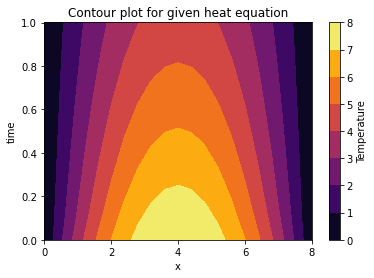

Displaying solution of heat equation u at each position (x,time) in tabulated form
   x    |  t=0    |  t=0.1    |  t=0.2    |   ...  |   t=end   
---------------------------------------------------------------
0.0         0.0         0.0         0.0     ...     0.0
0.4         1.52         1.41         1.34     ...     0.7
0.8         2.88         2.73         2.61     ...     1.38
1.2         4.08         3.92         3.78     ...     2.03
1.6         5.12         4.96         4.81     ...     2.62
2.0         6.0         5.84         5.68     ...     3.16
2.4         6.72         6.56         6.4     ...     3.61
2.8         7.28         7.12         6.96     ...     3.97
3.2         7.68         7.52         7.36     ...     4.24
3.6         7.92         7.76         7.6     ...     4.41
4.0         8.0         7.84         7.68     ...     4.46
4.4         7.92         7.76         7.6     ...     4.41
4.8         7.68         7.52         7.36     ...     4.24
5.2         7.28   

In [223]:
#1D heat equation using Crank-Nicolson

#defining position and time grid nx and nt
nx = 20
nt = 500
h = 8 / nx
k = 1 / nt
r = k / (h * h)
time_steps = 500
time = np.linspace(0, (time_steps + 0.5) * k, nt+1)
x = np.linspace(0, 8.0001, nx+1)

u = np.zeros((nx+1, time_steps+1))
b = np.zeros(nx-1)

#Initialising and specifying boundary conditions
for i in range(1, nx):
    u[i, 0] = 4 * x[i] - x[i] * x[i] / 2

u[0, :] = 0
u[nx, :] = 0

#creating the matrix (2I + aB and 2I - aB)

A = np.zeros((nx-1, nx-1))
B = np.zeros((nx-1, nx-1))
for i in range(nx-1):
    A[i, i] = 1/2 + 2 * r
    B[i, i] = 1/2 - 2 * r
    if i < nx-2:
        A[i, i+1] = -r
        A[i+1, i] = -r
        B[i, i+1] = r
        B[i+1, i] = r

# inverse of 2I + aB
A_inv = np.linalg.inv(A)

for j in range (1,time_steps+1):
    b[0]=r*u[0,j-1]+r*u[0,j]
    b[nx-2]=r*u[nx,j-1]+r*u[nx,j]
    v=np.dot(B,u[1:(nx),j-1])
    u[1:(nx),j]=np.dot(A_inv,v+b)
    
fig, ax = plt.subplots(1,1)
X, Y = np.meshgrid(x, time)
plt.contourf(X, Y, u.transpose(),cmap="inferno")
plt.title("Contour plot for given heat equation")
plt.xlabel("x")
plt.ylabel("time")
plt.colorbar(label="Temperature")
plt.show()

print("Displaying solution of heat equation u at each position (x,time) in tabulated form")
print("   x    |  t=0    |  t=0.1    |  t=0.2    |   ...  |   t=end   ")
print("---------------------------------------------------------------")
for i in range(nx+1):
    print(round(x[i],2),"       ",round(u[i,0],2), "       ", round(u[i,20],2), "       ",round(u[i,40],2) , "    ...    ", round(u[i,-1],2))
    
    

# Answer to Q5

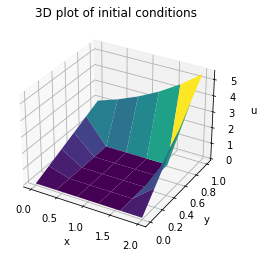

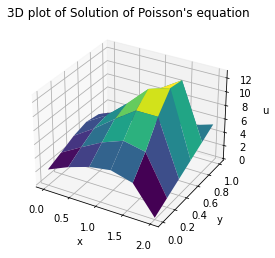

Displaying solution u at each position (x,y) in tabulated form
x           y               u
-------------------------------------
0.0       0.0       2.096258979597
0.0       0.2       3.413662598291893
0.0       0.4       4.408520572371049
0.0       0.6       4.8970255708263775
0.0       0.8       4.0448091704555615
0.4       0.0       2.97137416432602
0.4       0.2       4.707066711066632
0.4       0.4       6.33974641354321
0.4       0.6       7.490536325885328
0.4       0.8       6.831130098240847
0.8       0.0       3.9132269683830545
0.8       0.2       5.881585643369913
0.8       0.4       8.149676564250798
0.8       0.6       10.254610086421625
0.8       0.8       10.244871711985985
1.2       0.0       4.462058985406425
1.2       0.2       6.312573987303611
1.2       0.4       8.916390984640234
1.2       0.6       11.8540871815413
1.2       0.8       12.805139210093367
1.6       0.0       4.115600218791952
1.6       0.2       5.324561196211925
1.6       0.4       7.53966421891

In [149]:
def rho(x,y):
    return -1*x*math.exp(y)

# Parameters
Nx = Ny = 6  # Number of grid points in x and y directions
Lx = 2
Ly = 1  # Domain length
dx = dy = Lx / (Nx - 1)  # Grid spacing
h = Lx/(Nx+1)
x = np.linspace(0, 2, Nx)
y = np.linspace(0, 1, Ny)

# Initialize grid and boundary conditions
u = np.zeros((Ny, Nx))  # Initialize grid with zeros

for i in range(Nx):
    u[i,0] = x[i]  # u(x, 0) = x
    u[i,Nx-1] = x[i]*math.exp(1)  # u(x, 1) = xe
       
for j in range(Ny):
    u[0 , j] = 0
    u[Ny-1 , j] = 2*math.exp(y[j])

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('3D plot of initial conditions')
plt.show()


def rho(x,y):
    return x*math.exp(y)
    
def solve_poisson(u, max_iter=1000, tol=1e-6):
    u1 = np.copy(u)
    for k in range(max_iter):
        u = np.copy(u1)
        for i in range(0, Ny-1):
            for j in range(0, Nx-1):
                u1[i, j] = (0.25) * (u[i+1, j] + u[i-1,j] + u[i,j+1] + u[i,j-1]) + (h)**2*rho(i,j)/4
        if np.max(np.abs(u1 - u)) < tol:
            break
    return u1

# Solve Poisson's equation
u = solve_poisson(u)

# Plot
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('3D plot of Solution of Poisson\'s equation')
plt.show()

print("Displaying solution u at each position (x,y) in tabulated form")
print("x           y               u")
print("-------------------------------------")
for i in range(Nx-1):
    for j in range(Ny-1):
        print(round(x[i],2), "     ", round(y[j],2), "     ", u[i,j])
    